In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('News.csv',index_col=0)
data.head(40000)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
16493,Victims of South Sudan attack on aid workers s...,KAMPALA (Reuters) - Foreign victims of an atta...,worldnews,"October 25, 2017",1
16494,"Kazakhstan to re-examine 2004 banker's death, ...",ALMATY (Reuters) - Kazakh state prosecutors sa...,worldnews,"October 25, 2017",1
16495,EU too? Lawmakers denounce harassment in Brussels,STRASBOURG/BRUSSELS (Reuters) - EU lawmakers a...,worldnews,"October 25, 2017",1
16496,"Brazil's Temer sent for tests, treatment for u...",SAO PAULO (Reuters) - Brazilian President Mich...,worldnews,"October 25, 2017",1


In [4]:
data.shape

(44919, 5)

In [5]:
data = data.drop(["title","subject","date"],axis=1)

In [6]:
data.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [7]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [8]:
data = data.sample(n=5000)

In [9]:
data.head(5000)

,text,class
19502,Four employees at an Oklahoma Department of Ve...,0
10333,WASHINGTON (Reuters) - U.S. President Barack O...,1
10452,(Reuters) - Democratic senators in Missouri we...,1
9052,"DORKING, England (Reuters) - A man charged wit...",1
13291,Rudy is the best! He stays on message and was ...,0
...,...,...
8525,NEW YORK (Reuters) - Democratic presidential n...,1
7176,University of Virginia professor and political...,0
19524,,0
22377,21st Century Wire says It s hard to not to dra...,0


In [10]:
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"],axis=1,inplace=True)


In [11]:
data.head(5000)

,text,class
0,MEXICO CITY (Reuters) - There were more murder...,1
1,How very diverse! These refugees sure know how...,0
2,The first time I heard Negan ask for 50 perc...,0
3,We hope these women realize they were being us...,0
4,Joe Piscopo is hysterical! He was on with Neil...,0
...,...,...
4995,MOSCOW (Reuters) - The Kremlin said on Thursda...,1
4996,It s beginning to get to the point where one c...,0
4997,"Just over a week ago, the state of Florida bec...",0
4998,Add another lie to an exhaustive list of Obama...,0


Text(1, 1171.5, 'Fake')

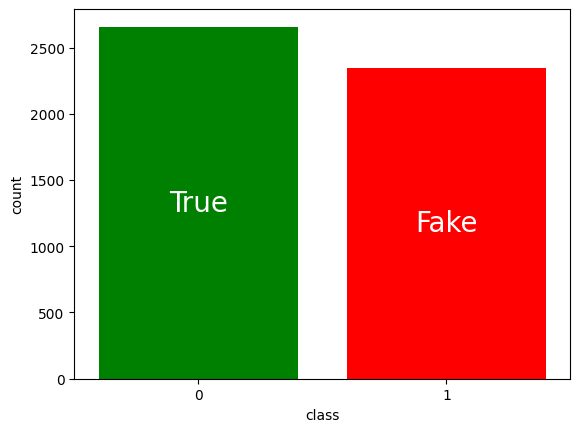

In [12]:
ax = sns.countplot(x='class', data=data)
ax.patches[0].set_facecolor('green')
ax.patches[1].set_facecolor('red')
ax.text(x=0, y=ax.patches[0].get_height() / 2, s='True', ha='center', va='center', color='white', fontsize=20)
ax.text(x=1, y=ax.patches[1].get_height() / 2, s='Fake', ha='center', va='center', color='white', fontsize=20)

In [13]:
from tqdm import tqdm
import re
import nltk

In [14]:
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RUN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RUN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
def preprocess_text(text_data): 
    preprocessed_text = [] 
      
    for sentence in tqdm(text_data): 
        sentence = re.sub(r'[^\w\s]', '', sentence) 
        preprocessed_text.append(' '.join(token.lower() 
                                  for token in str(sentence).split() 
                                  if token not in stopwords.words('english'))) 
  
    return preprocessed_text

In [16]:
preprocessed_review = preprocess_text(data['text'].values)
data['text'] = preprocessed_review

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [04:34<00:00, 18.21it/s]


In [17]:
data.head(5000)

,text,class
0,mexico city reuters there murders october mexi...,1
1,how diverse these refugees sure know assimilat...,0
2,the first time i heard negan ask 50 percent ev...,0
3,we hope women realize used george soros leftis...,0
4,joe piscopo hysterical he neil cavuto broke im...,0
...,...,...
4995,moscow reuters the kremlin said thursday russi...,1
4996,it beginning get point one wonder donald trump...,0
4997,just week ago state florida became home worst ...,0
4998,add another lie exhaustive list obama lies eme...,0


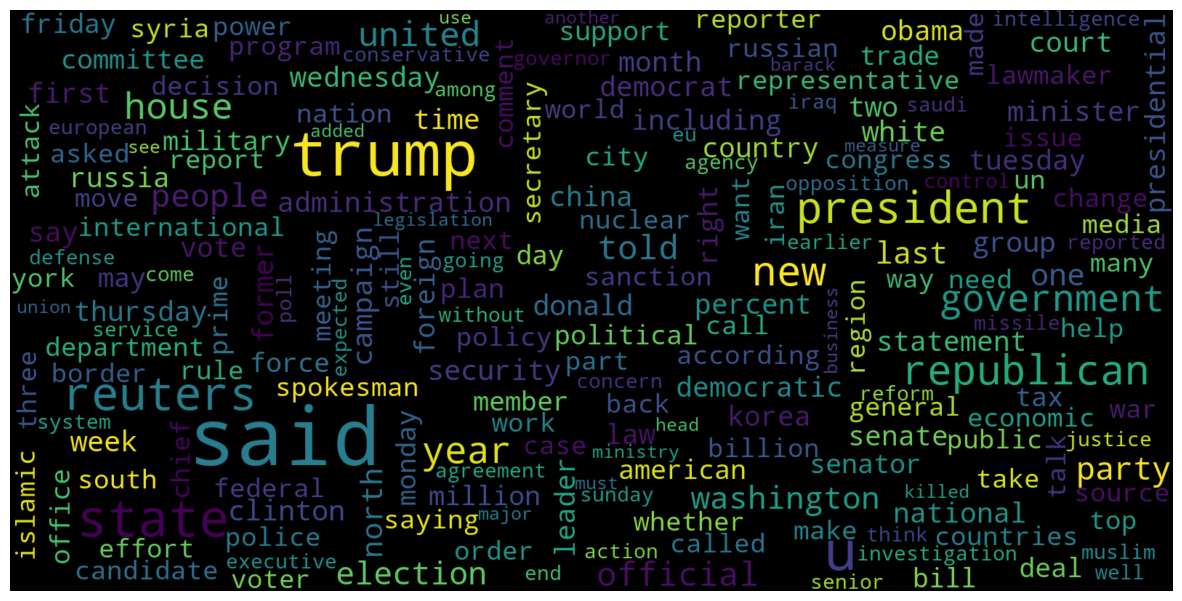

In [18]:
# Real 
consolidated = ' '.join( 
    word for word in data['text'][data['class'] == 1].astype(str)) 
wordCloud = WordCloud(width=1600, 
                      height=800, 
                      random_state=21, 
                      max_font_size=110, 
                      collocations=False) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 

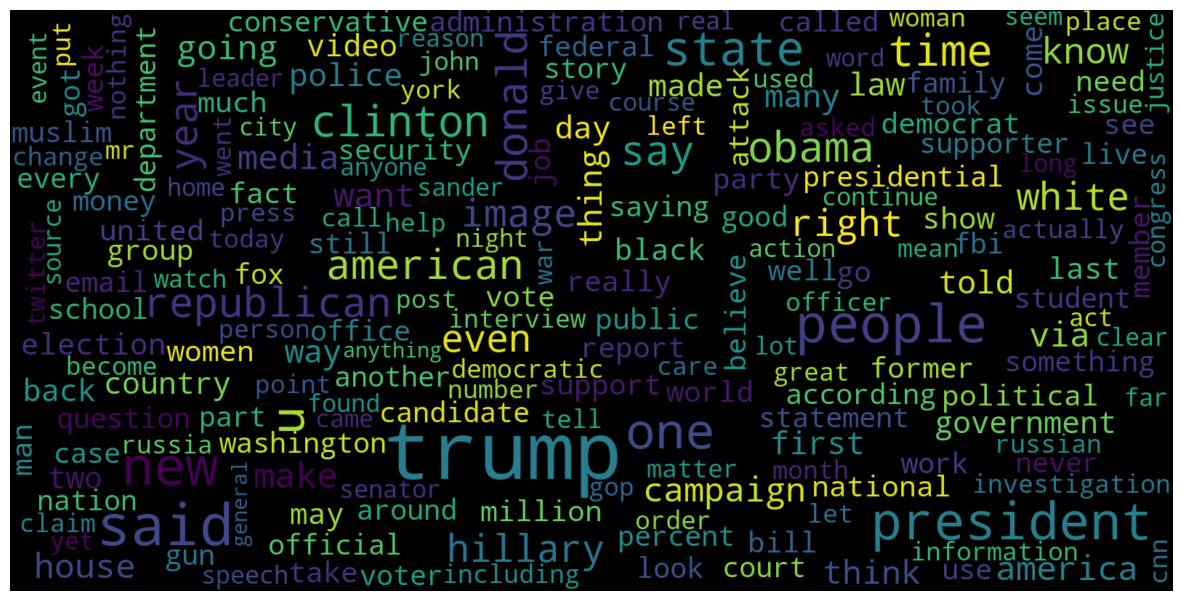

In [19]:
# Fake 
consolidated = ' '.join( 
    word for word in data['text'][data['class'] == 0].astype(str)) 
wordCloud = WordCloud(width=1600, 
                      height=800, 
                      random_state=21, 
                      max_font_size=110, 
                      collocations=False) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

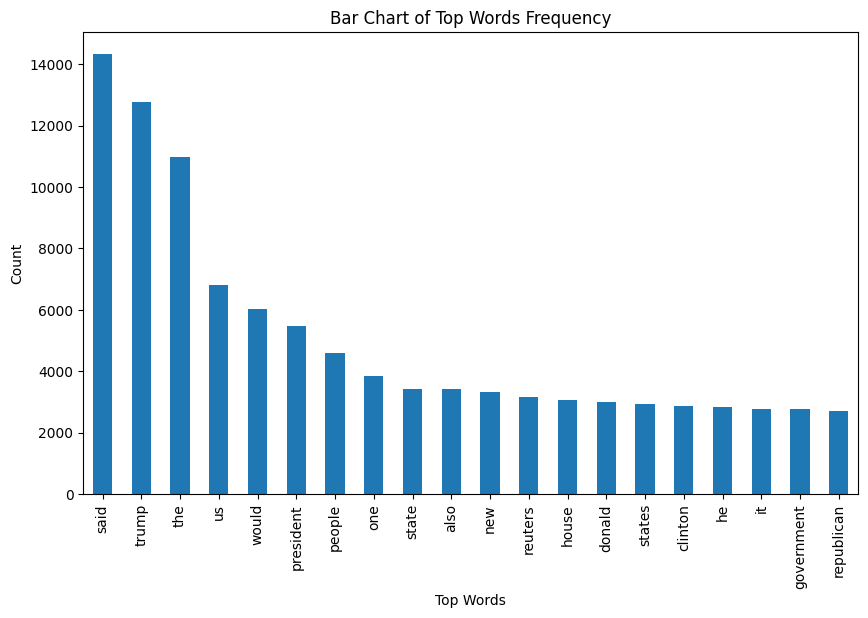

In [20]:
from sklearn.feature_extraction.text import CountVectorizer 
  
  
def get_top_n_words(corpus, n=None): 
    vec = CountVectorizer().fit(corpus) 
    bag_of_words = vec.transform(corpus) 
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()] 
    words_freq = sorted(words_freq, key=lambda x: x[1], 
                        reverse=True) 
    return words_freq[:n] 
  
  
common_words = get_top_n_words(data['text'], 20) 
df1 = pd.DataFrame(common_words, columns=['Review', 'count']) 
  
df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot( 
    kind='bar', 
    figsize=(10, 6), 
    xlabel="Top Words", 
    ylabel="Count", 
    title="Bar Chart of Top Words Frequency"
) 

In [21]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression 
  
x_train, x_test, y_train, y_test = train_test_split(data['text'],  
                                                    data['class'],  
                                                    test_size=0.25)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer 
  
vectorization = TfidfVectorizer() 
x_train = vectorization.fit_transform(x_train) 
x_test = vectorization.transform(x_test)

In [23]:
from sklearn.linear_model import LogisticRegression 
  
model = LogisticRegression() 
model.fit(x_train, y_train) 
  
# testing the model 
print(accuracy_score(y_train, model.predict(x_train))) 
print(accuracy_score(y_test, model.predict(x_test))) 

0.992
0.968


In [24]:
from sklearn.tree import DecisionTreeClassifier 
  
model = DecisionTreeClassifier() 
model.fit(x_train, y_train) 
  
# testing the model 
print(accuracy_score(y_train, model.predict(x_train))) 
print(accuracy_score(y_test, model.predict(x_test))) 

1.0
0.996


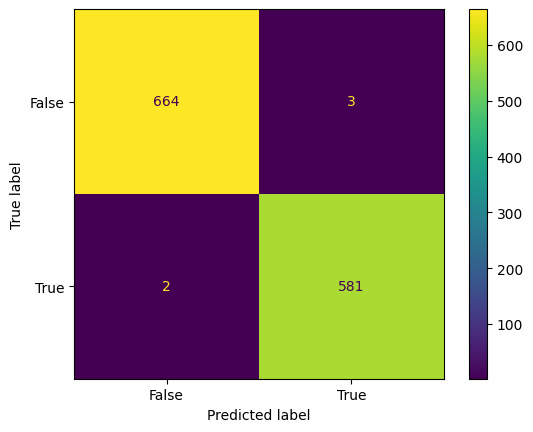

In [25]:
# Confusion matrix of Results
from sklearn import metrics 
cm = metrics.confusion_matrix(y_test, model.predict(x_test)) 
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                            display_labels=[False, True]) 
  
cm_display.plot() 
plt.show() 